In [1]:
import optuna
import subprocess
import json
import shutil
import os
from train import main as train_main

def objective(trial):
    # パラメータの提案
    hidden_size = trial.suggest_categorical("hidden_size", [4, 3, 2, 1])
    gamma = trial.suggest_float("gamma", 0.90, 0.99)
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    episodes = trial.suggest_int("episodes", 100, 300, step=20)  # 100, 110, 120, ...
    
    # モデルパスの定義
    model_path = f"save/model_trial_{trial.number}_h{hidden_size}_lr{lr:.5f}_g{gamma:.3f}.pth"

    # 訓練スタート
    train_main(
        lr=lr,
        gamma=gamma,
        hidden_size=hidden_size,
        episodes=episodes,
        save_path=model_path  # ←動的に渡す！
    )
    
    # パスを trial に記録
    trial.set_user_attr("model_path", model_path)
    
    # 訓練結果を保存
    result = subprocess.run(["python", "inference.py", model_path], capture_output=True, text=True)
    # デバッグ出力を追加！
    print("STDOUT:\n", result.stdout)
    print("STDERR:\n", result.stderr)

    distance = float(result.stdout.strip())
    return distance

[I 2025-04-19 17:04:32,744] A new study created in memory with name: no-name-9935fc07-21c1-4207-a325-eddb305e3ccd


  0%|          | 0/100 [00:00<?, ?it/s]

Episode: 0, Total Reward: -1201.1411536238222
tensor([[55.4064, 30.8067,  0.0000,  1.0000],
        [31.2545, 86.5796,  0.0000,  1.0000],
        [76.9688, 30.6070,  0.0000,  1.0000],
        [67.5774, 99.6243,  0.0000,  1.0000],
        [16.7908, 15.7206,  0.0000,  1.0000],
        [79.3350, 35.9998,  0.0000,  1.0000],
        [87.3134, 54.7349,  0.0000,  1.0000],
        [61.9234, 40.5180,  0.0000,  1.0000],
        [ 0.1804,  6.0056,  0.0000,  1.0000],
        [83.6896, 12.6977,  0.0000,  1.0000],
        [83.5049, 74.2825,  0.0000,  1.0000],
        [23.1900, 93.9111,  0.0000,  1.0000],
        [82.5086, 66.3404,  0.0000,  1.0000],
        [21.3170, 84.6506,  0.0000,  1.0000],
        [53.6859, 18.9159,  0.0000,  1.0000],
        [25.5141, 91.6038,  0.0000,  1.0000],
        [63.7605, 26.0471,  0.0000,  1.0000],
        [72.6618, 27.5895,  0.0000,  1.0000],
        [86.5299, 76.4639,  0.0000,  1.0000],
        [31.2095,  3.1010,  0.0000,  1.0000],
        [68.9398, 78.0183,  0.0000

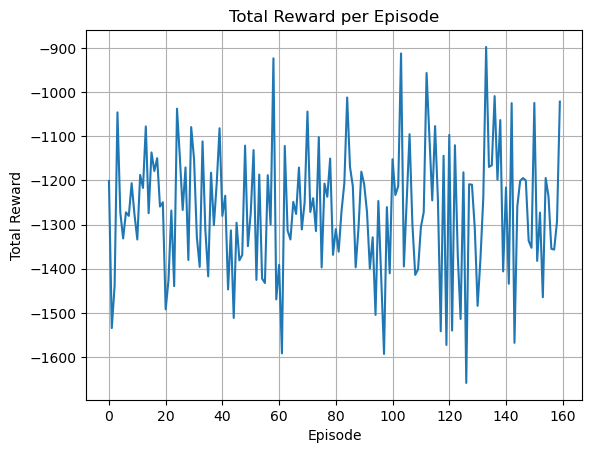

[W 2025-04-19 17:04:42,347] Trial 0 failed with parameters: {'hidden_size': 3, 'gamma': 0.9137733084749421, 'lr': 2.0167493207481758e-05, 'episodes': 160} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/iwashiro/.conda/envs/tsp/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_86565/2339438951.py", line 31, in objective
    result = subprocess.run(["python", "inference.py", model_path], capture_output=True, text=True)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/iwashiro/.conda/envs/tsp/lib/python3.12/subprocess.py", line 550, in run
    stdout, stderr = process.communicate(input, timeout=timeout)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/iwashiro/.conda/envs/tsp/lib/python3.12/subprocess.py", line 1209, in c

KeyboardInterrupt: 

In [2]:
# 最適化開始
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)
best_model_path = study.best_trial.user_attrs["model_path"]
# 結果表示
print("Best trial:")
print(study.best_trial)
print("Best model path:", best_model_path)

In [ ]:
from inference import main as inference_main

# best モデルでプロットしたい場合
inference_main(best_model_path, episodes=100, plot=True)

Episode: 0, Total Reward: -936.2207119254754
tensor([[28.1734, 40.2056,  0.0000,  1.0000],
        [14.8423, 39.6412,  0.0000,  1.0000],
        [30.9253,  7.0016,  0.0000,  1.0000],
        [11.5928,  0.7307,  0.0000,  1.0000],
        [49.2147, 32.9588,  0.0000,  1.0000],
        [ 8.9261, 92.9801,  0.0000,  1.0000],
        [59.6064, 48.7596,  0.0000,  1.0000],
        [92.1974, 74.3623,  0.0000,  1.0000],
        [99.1434, 53.7903,  0.0000,  1.0000],
        [75.1379, 19.0616,  0.0000,  1.0000],
        [86.6179,  0.6489,  0.0000,  1.0000],
        [20.0886, 81.1104,  0.0000,  1.0000],
        [ 2.0497, 37.4292,  0.0000,  1.0000],
        [58.1565, 19.2724,  0.0000,  1.0000],
        [97.2633, 76.0564,  0.0000,  1.0000],
        [96.4065, 69.6125,  0.0000,  1.0000],
        [43.8193, 99.1515,  0.0000,  1.0000],
        [50.1949, 94.9845,  0.0000,  1.0000],
        [49.8758, 94.6040,  0.0000,  1.0000],
        [96.7111, 72.5209,  0.0000,  1.0000],
        [59.0224, 15.3773,  0.0000,

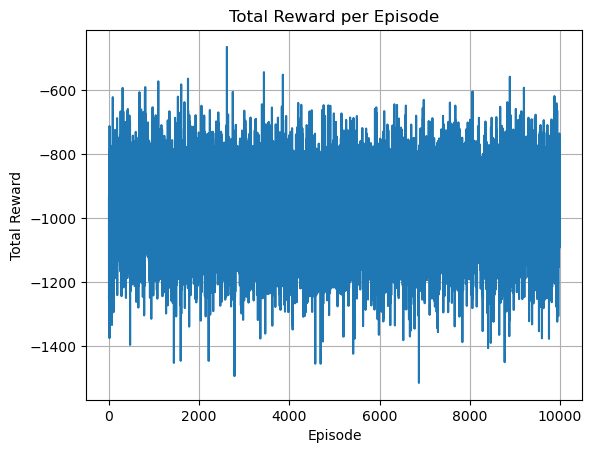

In [1]:
from train import main as train_main

# モデルパスの定義
model_test_path = f"save/model_test.pth"

# 訓練スタート
train_main(
    lr=0.001,
    gamma=0.95,
    hidden_size=4,
    episodes=10000,
    save_path=model_test_path  # ←動的に渡す！
)

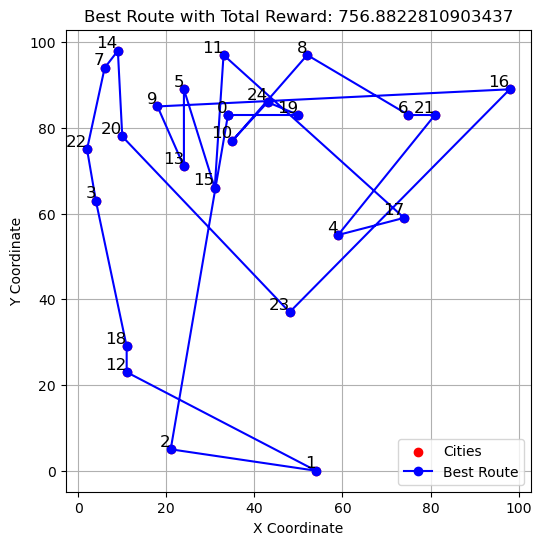

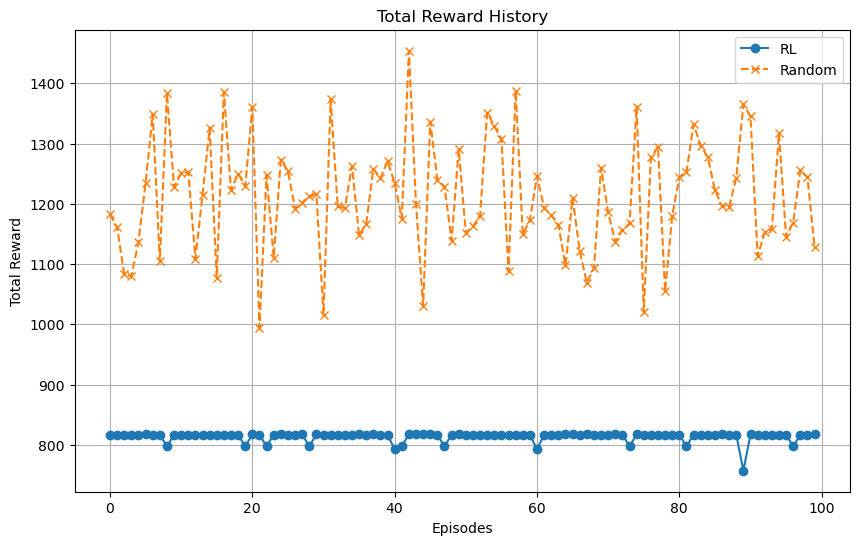

814.0053640003035


In [2]:
from inference import main as inference_main

model_test_path = f"save/model_test.pth"

# best モデルでプロットしたい場合z
inference_main(model_test_path, episodes=100, plot=True)